## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import sklearn;
import warnings
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.0.2


In [3]:
dataset_treino = pd.read_csv("datataset_bank_loan.csv")

## Data Exploration

In [4]:
dataset = dataset_treino

In [4]:
dataset.shape

(93174, 23)

In [5]:
dataset.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,None,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [7]:
display(dataset.describe(include='all').T)
display(dataset.describe(include='float').T)
dataset.describe(include='object').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,93174,NaN,NaN,NaN,3.50502e+07,2.41493e+07,70735,1.08598e+07,3.71075e+07,5.85989e+07,7.35197e+07
loan_amnt,93174,NaN,NaN,NaN,14733.9,8428.18,500,8000,13000,20000,35000
loan_term,93174,2,3 years,65211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interest_rate,93174,NaN,NaN,NaN,13.2334,4.36873,5.32,9.99,12.99,16.2,28.99
loan_grade,93174,7,B,26865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_subgrade,93174,35,B4,5879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_experience,88472,3,<5 Years,40610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,93174,5,MORTGAGE,46445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,93173,NaN,NaN,NaN,75028.3,69454.8,1200,45000,64000,90000,9.5e+06
income_verification_status,93174,3,Source Verified,34487,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
interest_rate,93174.0,13.233433,4.368728,5.32,9.99,12.990,16.2000,28.99
annual_income,93173.0,75028.258559,69454.783994,1200.00,45000.00,64000.000,90000.0000,9500000.00
debt_to_income,93174.0,18.127623,8.563084,0.00,11.93,17.640,23.8900,672.52
delinq_2yrs,93172.0,0.316994,0.880859,0.00,0.00,0.000,0.0000,22.00
public_records,93172.0,0.196121,0.581188,0.00,0.00,0.000,0.0000,49.00
total_acc,93172.0,25.248905,11.855061,1.00,17.00,24.000,32.0000,119.00
interest_receive,93174.0,1747.263530,2088.236141,0.00,439.88,1070.755,2219.6125,23172.31
last_week_pay,91250.0,58.154882,44.326560,0.00,22.00,48.000,83.0000,291.00
total_current_balance,85788.0,139252.923288,157686.790921,0.00,29642.00,79363.500,207160.0000,8000078.00
total_revolving_limit,85788.0,32085.902889,47052.514708,0.00,14000.00,23700.000,39700.0000,9999999.00


,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B4,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


In [8]:
dataset.duplicated().sum()


0

#### Dropando a coluna de id

In [9]:
dataset.drop(['ID'], axis=1, inplace=True)

### Checking all columnsm

In [10]:
dataset.isnull().sum().sort_values(ascending=False)

total_current_balance         7386
total_revolving_limit         7386
job_experience                4702
last_week_pay                 1924
total_acc                        2
public_records                   2
delinq_2yrs                      2
annual_income                    1
default                          0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
home_ownership                   0
state_code                       0
income_verification_status       0
loan_purpose                     0
debt_to_income                   0
revolving_balance                0
interest_receive                 0
application_type                 0
loan_amnt                        0
dtype: int64

In [11]:
for col in dataset.columns:
    print(f'a coluna {col} tem os seguintes valores {dataset[col].unique()}')

a coluna loan_amnt tem os seguintes valores [ 9000 18000 16000 ... 33225 30775 31425]
a coluna loan_term tem os seguintes valores ['3 years' '5 years']
a coluna interest_rate tem os seguintes valores [ 9.17 13.65  7.26 13.99  6.39 12.69 11.14  6.49 10.99 12.49 12.29  8.19
 20.5  10.75 19.52  6.89 14.65 23.4   8.18 21.48 17.86 17.57 19.19 14.49
 10.16 11.99 15.31 13.98  7.89 13.18 10.49 13.33  6.68 11.67 16.99  6.03
  9.99 13.11 12.35  5.32 25.78 12.99 18.25  6.62  7.9  14.64 18.75 12.05
 19.99 14.99 11.71 23.99 15.61 17.14 25.89  6.24 12.85 15.58 11.44 19.24
 22.99 15.41  8.9   8.67 17.27 16.55 13.68 14.16  9.67 20.99 11.53 13.43
 17.1  24.99 18.55 10.64 19.72 15.7  22.2   8.39 11.22  9.71 16.29 14.46
 23.63 12.12  8.38  5.93 18.2  21.99  9.76 20.49 22.47 14.31  7.69 16.24
  8.88 23.7  15.88 13.53 18.54 18.49 12.61 11.55 10.15 18.84 11.49 19.22
 14.33 14.09 14.3  14.48 14.47 21.15 22.15 18.99 20.8  20.2  15.1  12.39
 17.77 13.23 15.8  22.4  19.2  15.59 13.48 13.67 14.98 23.28 25.99 17.

/tmp/ipykernel_30333/436196091.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


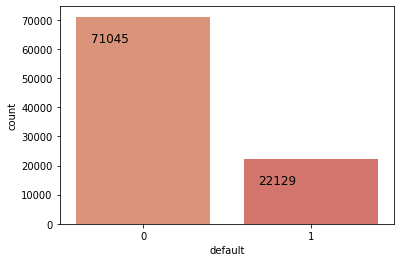

In [12]:
sns.set_palette("flare")
ax = sns.countplot(x='default', data=dataset)
ax = plt.subplot()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

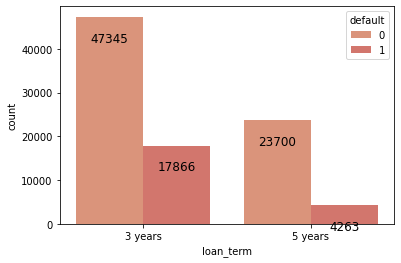

In [13]:
sns.set_palette("flare")
ax =  sns.countplot(x='loan_term', hue='default', data=dataset)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

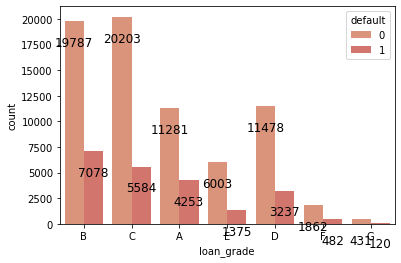

In [14]:
sns.set_palette("flare")
ax =  sns.countplot(x='loan_grade', hue='default', data=dataset)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

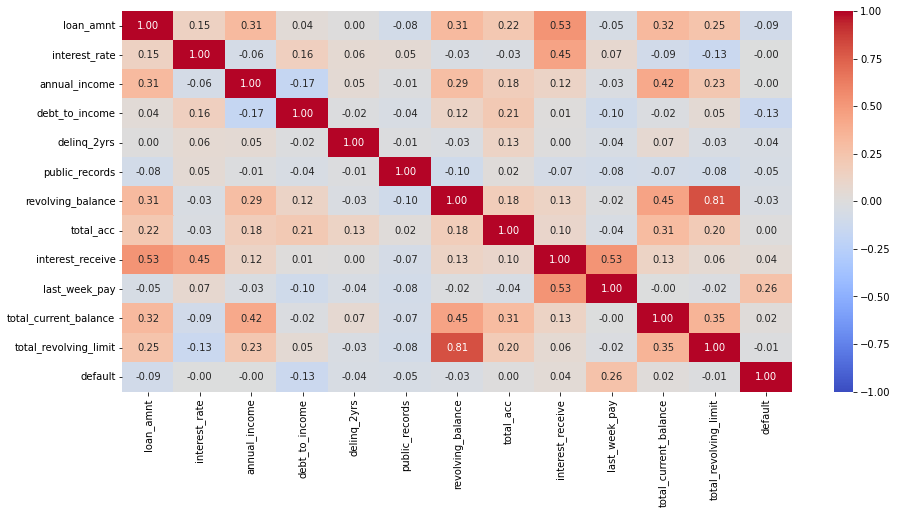

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='coolwarm');

## Features Prep

In [16]:
dataset.isna().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [17]:
dataset.annual_income.fillna(dataset.annual_income.mean(),inplace=True)
dataset.delinq_2yrs.fillna(dataset.delinq_2yrs.mean(),inplace=True)
dataset.public_records.fillna(dataset.public_records.mean(),inplace=True)
dataset.last_week_pay.fillna(dataset.last_week_pay.mean(),inplace=True)
dataset.total_current_balance.fillna(dataset.total_current_balance.mean(),inplace=True)
dataset.total_revolving_limit.fillna(dataset.total_revolving_limit.mean(),inplace=True)

In [18]:
dataset.isna().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      0
public_records                   0
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                    0
total_current_balance            0
total_revolving_limit            0
default                          0
dtype: int64

In [19]:
dataset = dataset.dropna()

In [21]:
state_code = {'NC':0, 'SC':1, 'TX':2, 'IL':3, 'NY':4, 'CT':5, 'CA':6, 'VA':7, 'MO':8, 'GA':9, 'OR':10,
       'NV':11, 'LA':12, 'RI':13, 'IN':14, 'AZ':15, 'OK':16, 'MN':17, 'WY':18, 'HI':19, 'MI':20, 'CO':21,
       'MS':22, 'NJ':23, 'WA':24, 'UT':25, 'KY':26, 'MA':27, 'FL':28, 'PA':29, 'WI':30, 'OH':31, 'DE':32,
       'WV':33, 'MD':34, 'TN':35, 'NE':36, 'AL':37, 'KS':38, 'NM':39, 'SD':40, 'DC':41, 'VT':42, 'MT':43,
       'AK':44, 'AR':45, 'NH':46, 'ND':47, 'ME':48, 'ID':49}
dataset['state_code'] =  dataset['state_code'].map(state_code).astype('int64')

/tmp/ipykernel_30333/1147581278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['state_code'] =  dataset['state_code'].map(state_code).astype('int64')


In [22]:
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('A1',1)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('A2',2)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('A3',3)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('A4',4)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('A5',5)

dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('B1',6)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('B2',7)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('B3',8)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('B4',9)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('B5',10)

dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('C1',11)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('C2',12)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('C3',13)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('C4',14)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('C5',15)

dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('D1',16)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('D2',17)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('D3',18)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('D4',19)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('D5',20)

dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('E1',21)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('E2',22)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('E3',23)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('E4',24)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('E5',25)

dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('F1',26)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('F2',27)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('F3',28)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('F4',29)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('F5',30)

dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('G1',31)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('G2',32)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('G3',33)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('G4',34)
dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('G5',35)

/tmp/ipykernel_30333/3232141381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('A1',1)
/tmp/ipykernel_30333/3232141381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_subgrade'] = dataset['loan_subgrade'].replace('A2',2)
/tmp/ipykernel_30333/3232141381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

loan_purpose = {'debt_consolidation':0, 'credit_card':1, 'other':2, 'home_improvement':3}
dataset['loan_purpose'] =  dataset['loan_purpose'].map(loan_purpose).astype('int64')

application_type = {'INDIVIDUAL': 0,'JOINT': 1}
dataset['application_type'] =  dataset['application_type'].map(application_type).astype('int64')

income_verification_status = {'Not Verified': 0,'Verified': 1,'Source Verified':2}
dataset['income_verification_status'] =  dataset['income_verification_status'].map(income_verification_status).astype('int64')

home_ownership = {'OWN': 0,'MORTGAGE': 1,'RENT':2, 'NONE':3, 'OTHER':4}
dataset['home_ownership'] =  dataset['home_ownership'].map(home_ownership).astype('int64')

loan_term = {'3 years': 0,'5 years': 1}
dataset['loan_term'] =  dataset['loan_term'].map(loan_term).astype('int64')

loan_grade = {'A': 0,'B': 1,'C':2,'D':3,'E':4,'F':5,'G':6}
dataset['loan_grade'] =  dataset['loan_grade'].map(loan_grade).astype('int64')

job_experience = {'<5 Years': 0,'6-10 years':1, '10+ years': 2}
dataset['job_experience'] =  dataset['job_experience'].map(job_experience).astype('int64')

In [23]:
colunasEncoding = ['income_verification_status','home_ownership','loan_term','loan_grade','job_experience','loan_purpose']

In [30]:
dataset['loan_purpose_debt'] =  np.where(dataset['loan_purpose'].isin(['debt_consolidation']),1,0)
dataset['loan_purpose_credit_card'] =  np.where(dataset['loan_purpose'].isin(['credit_card']),1,0)
dataset['loan_purpose_other'] =  np.where(dataset['loan_purpose'].isin(['other']),1,0)
dataset['loan_purpose_home_improvement'] =  np.where(dataset['loan_purpose'].isin(['home_improvement']),1,0)


/tmp/ipykernel_30333/2739504271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_purpose_debt'] =  np.where(dataset['loan_purpose'].isin(['debt_consolidation']),1,0)
/tmp/ipykernel_30333/2739504271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_purpose_credit_card'] =  np.where(dataset['loan_purpose'].isin(['credit_card']),1,0)
/tmp/ipykernel_30333/2739504271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [31]:
dataset['job_experience_<5 Years'] =  np.where(dataset['job_experience'].isin(['<5 Years']),1,0)
dataset['job_experience_6-10 years'] =  np.where(dataset['job_experience'].isin(['6-10 years']),1,0)
dataset['job_experience_10+ years'] =  np.where(dataset['job_experience'].isin(['10+ years']),1,0)

/tmp/ipykernel_30333/1778664832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['job_experience_<5 Years'] =  np.where(dataset['job_experience'].isin(['<5 Years']),1,0)
/tmp/ipykernel_30333/1778664832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['job_experience_6-10 years'] =  np.where(dataset['job_experience'].isin(['6-10 years']),1,0)
/tmp/ipykernel_30333/1778664832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [32]:
dataset['loan_grade_Grade_A'] = np.where(dataset['loan_grade'].isin(['A']),1,0) 
dataset['loan_grade_Grade_B'] = np.where(dataset['loan_grade'].isin(['B']),1,0)
dataset['loan_grade_Grade_C'] = np.where(dataset['loan_grade'].isin(['C']),1,0)
dataset['loan_grade_Grade_D'] = np.where(dataset['loan_grade'].isin(['D']),1,0)
dataset['loan_grade_Grade_E'] = np.where(dataset['loan_grade'].isin(['E']),1,0) 
dataset['loan_grade_Grade_F'] = np.where(dataset['loan_grade'].isin(['F']),1,0)
dataset['loan_grade_Grade_G'] = np.where(dataset['loan_grade'].isin(['G']),1,0)

/tmp/ipykernel_30333/2076905791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_grade_Grade_A'] = np.where(dataset['loan_grade'].isin(['A']),1,0)
/tmp/ipykernel_30333/2076905791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_grade_Grade_B'] = np.where(dataset['loan_grade'].isin(['B']),1,0)
/tmp/ipykernel_30333/2076905791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [33]:
dataset['loan_term_3 Years'] =  np.where(dataset['loan_term'].isin(['3 years']),1,0)
dataset['loan_term_5 years'] =  np.where(dataset['loan_term'].isin(['5 years']),1,0)


/tmp/ipykernel_30333/3612904620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_term_3 Years'] =  np.where(dataset['loan_term'].isin(['3 years']),1,0)
/tmp/ipykernel_30333/3612904620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_term_5 years'] =  np.where(dataset['loan_term'].isin(['5 years']),1,0)


In [34]:
dataset['home_ownership_OWN'] =  np.where(dataset['home_ownership'].isin(['OWN']),1,0)
dataset['home_ownership_MORTGAGE'] =  np.where(dataset['home_ownership'].isin(['MORTGAGE']),1,0)
dataset['home_ownership_NONE'] =  np.where(dataset['home_ownership'].isin(['NONE']),1,0)
dataset['home_ownership_OTHER'] =  np.where(dataset['home_ownership'].isin(['OTHER']),1,0)


/tmp/ipykernel_30333/3338767660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['home_ownership_OWN'] =  np.where(dataset['home_ownership'].isin(['OWN']),1,0)
/tmp/ipykernel_30333/3338767660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['home_ownership_MORTGAGE'] =  np.where(dataset['home_ownership'].isin(['MORTGAGE']),1,0)
/tmp/ipykernel_30333/3338767660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [35]:
dataset['income_verification_status_Not Verified'] =  np.where(dataset['income_verification_status'].isin(['Not Verified']),1,0)
dataset['income_verification_status_Verified'] =  np.where(dataset['income_verification_status'].isin(['Verified']),1,0)
dataset['income_verification_status_Source Verified'] =  np.where(dataset['income_verification_status'].isin(['Source Verified']),1,0)

/tmp/ipykernel_30333/3409544953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['income_verification_status_Not Verified'] =  np.where(dataset['income_verification_status'].isin(['Not Verified']),1,0)
/tmp/ipykernel_30333/3409544953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['income_verification_status_Verified'] =  np.where(dataset['income_verification_status'].isin(['Verified']),1,0)
/tmp/ipykernel_30333/3409544953.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [36]:
dataset.columns

Index(['loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default',
       'loan_purpose_debt', 'loan_purpose_credit_card', 'loan_purpose_other',
       'loan_purpose_home_improvement', 'job_experience_<5 Years',
       'job_experience_6-10 years', 'job_experience_10+ years',
       'loan_grade_Grade_A', 'loan_grade_Grade_B', 'loan_grade_Grade_C',
       'loan_grade_Grade_D', 'loan_grade_Grade_E', 'loan_grade_Grade_F',
       'loan_grade_Grade_G', 'loan_term_3 Years', 'loan_term_5 years',
       'home_ownership_OWN', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'income_verification_status_Not 

In [37]:
features = ['default','loan_amnt', 'interest_rate', 
       'loan_subgrade',  'annual_income','state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive',  'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 
       'loan_purpose_debt', 'loan_purpose_credit_card', 'loan_purpose_other',
       'loan_purpose_home_improvement', 'job_experience_<5 Years',
       'job_experience_6-10 years', 'job_experience_10+ years',
       'loan_grade_Grade_A', 'loan_grade_Grade_B', 'loan_grade_Grade_C',
       'loan_grade_Grade_D', 'loan_grade_Grade_E', 'loan_grade_Grade_F',
       'loan_grade_Grade_G', 'loan_term_3 Years', 'loan_term_5 years',
       'home_ownership_OWN', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'income_verification_status_Not Verified',
       'income_verification_status_Verified',
       'income_verification_status_Source Verified']

In [117]:
dataset_bank_loan.shape

(67463, 27)

In [118]:
dataset_filtrado = dataset_bank_loan[(dataset_bank_loan['Initial_List_Status'] == 'f')]

In [119]:
dataset_filtrado['Initial_List_Status'].unique()

array(['f'], dtype=object)

In [120]:
dataset_filtrado.drop(columns=['Initial_List_Status']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31164 entries, 1 to 67462
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Status                          31164 non-null  int64  
 1   Interest_Rate                        31164 non-null  float64
 2   Grade_A                              31164 non-null  int64  
 3   Grade_B                              31164 non-null  int64  
 4   Grade_C                              31164 non-null  int64  
 5   Grade_D                              31164 non-null  int64  
 6   Grade_E                              31164 non-null  int64  
 7   Grade_F                              31164 non-null  int64  
 8   Grade_G                              31164 non-null  int64  
 9   Sub_Grade                            31164 non-null  int64  
 10  Employment_Duration_Mortage          31164 non-null  int64  
 11  Employment_Duration_Rent    

ID - Identificador
Loan Amount - Quantia de empréstimo aplicado
Funded Amount - Quantia do empréstimo financiado
Funded Amount Investor - Quantia do empréstimo aprovado pelos investidores
Term - Prazo do empréstimo (em meses)
Batch Enrolled - Números de lote para representantes
Interest Rate - Taxa de juro (%) sobre empréstimo
Grade - Nota pelo banco ( A ao F)
Sub Grade - Subclassificação de notas pelo banco ( A1 ao F5)
Employment Duration -Mortgage ( Hipotecada ), Own ( Própria ), Rent ( Alugada )
Home Ownership - Proprietário da Casa
Verification Status - Verificação dos rendimentos pelo banco, Source Verified ( Fonte Verificada ), Verified ( Verificado ), Not verified (Não verificado)
Payment Plan - Se algum plano de pagamento começou contra o empréstimo, True & False
Loan Title - Título do empréstimo fornecido, Credit card refinancing ( Refinanciamento por cartão de crédito ), Debt consolidation (Consolidação da dívida), Home Improvement ( Melhoria do lar), Personal ( Pessoal ), Green Loan ( Empréstimos verdes ), Other ( Outros )
Debit to Income - Relação de reembolso da dívida mensal total do representante dividido pelo rendimento mensal autodeclarado, excluindo a hipoteca
Delinquency-two years - Número de vezes em que ficou com infração de 30 ou mais dias nos últimos 2 anos
Inquires -six months - Número total de inquéritos nos últimos 6 meses
Open Account - Quantidade em número de linhas de crédito abertas, na linha de crédito dos representantes.
Public Record - Número de registros públicos pejorativos
Revolving Balance - Saldo total do crédito rotativo
Revolving Utilities - Quantia de crédito que um representante está utilizando, relativamente ao Saldo Rotativo ( Revolving Balance )
Total Accounts - Número total de linhas de crédito disponíveis, na linha de crédito dos representantes.
Initial List Status - Lista de Status do Empréstimo W (Em espera), F (Encaminhado)
Total Received Interest - Juros totais recebidos até à data
Total Received Late Fee - Taxa de atraso total recebida até à data
Recoveries - Cobrança da taxa de recuperação bruta
Collection Recovery Fee - Taxa de correio fora da taxa de recolha
Collection 12 Months Medical - Total de coleções nos últimos 12 meses, excluindo as coleções médicas
Application Type - Indica quando o representante é: indivíduo ( Individual ) ou Conjunto ( Joint )
Last week Pay - Indica quanto tempo (em semanas) um representante pagou o IME após a inscrição do lote
Accounts Delinquent - Número de contas em que o representante é infrator
Total Collection Amount - Saldo corrente total de todas as contas
Total Current Balance - Saldo corrente total de todas as contas
Total Revolving Credit Limit - Limite total do crédito rotativo
Loan Status - 1 = Em situação de inadimplência, 0 = Em situação de não inadimplência

/tmp/ipykernel_9166/4272014911.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


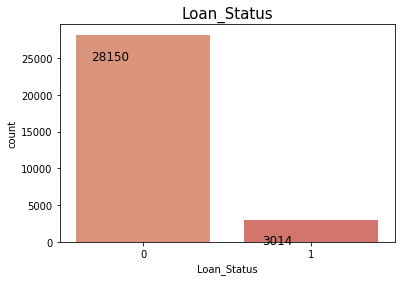

In [121]:
sns.set_palette("flare")
ax = sns.countplot(x='Loan_Status', data=dataset_filtrado)
ax.set_title('Loan_Status', fontsize=15)
ax = plt.subplot()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

In [122]:
X = dataset_filtrado[train_features]
y = dataset_filtrado[target]

In [123]:
over = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = over.fit_resample(X, y)

In [124]:
dataset_bank_loan_over_05 = pd.concat([pd.DataFrame(X_over),pd.DataFrame(y_over)],axis=1)
dataset_bank_loan_over_05

,Interest_Rate,Initial_List_Status,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Sub_Grade,...,Loan_Title,Debit_to_Income,Delinquency_two_years,Inquires_six_months,Open_Account,Revolving_Balance,Revolving_Utilities,Total_Accounts,Accounts_Delinquent,Loan_Status
0,12.237563,f,0,0,1,0,0,0,0,18,...,3,15.412409,0,0,12,812,78.297186,13,0,0
1,5.520413,f,0,0,1,0,0,0,0,10,...,2,10.048549,1,0,11,1361,35.073345,30,0,0
2,8.627337,f,0,1,0,0,0,0,0,5,...,3,14.266474,0,0,17,4005,61.279556,46,0,0
3,9.016252,f,0,0,1,0,0,0,0,9,...,3,29.232811,0,0,10,542,46.390512,12,0,0
4,14.848190,f,0,1,0,0,0,0,0,4,...,2,17.715302,0,0,9,5904,44.388997,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42220,8.573783,f,0,0,1,0,0,0,0,5,...,2,31.986298,0,0,13,3609,67.224519,15,0,1
42221,10.476915,f,0,1,0,0,0,0,0,5,...,2,36.600210,0,0,8,5096,37.820011,18,0,1
42222,6.407209,f,0,0,1,0,0,0,0,15,...,3,21.149032,0,0,7,7590,53.622170,26,0,1
42223,11.208387,f,0,1,0,0,0,0,0,11,...,2,31.824949,0,1,8,7587,64.697228,8,0,1


In [125]:
dataset_bank_loan_over_05.columns

Index(['Interest_Rate', 'Initial_List_Status', 'Grade_A', 'Grade_B', 'Grade_C',
       'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G', 'Sub_Grade',
       'Employment_Duration_Mortage', 'Employment_Duration_Rent',
       'Employment_Duration_Own', 'Home_Ownership',
       'Verification_Status_Not_Verified',
       'Verification_Status_Source_Verified', 'Verification_Status_Verified',
       'Loan_Title', 'Debit_to_Income', 'Delinquency_two_years',
       'Inquires_six_months', 'Open_Account', 'Revolving_Balance',
       'Revolving_Utilities', 'Total_Accounts', 'Accounts_Delinquent',
       'Loan_Status'],
      dtype='object')

In [126]:
print(f'Tamanho dataset original {len(dataset_bank_loan)} dataset com smot {len(dataset_bank_loan_over_05)}')

Tamanho dataset original 67463 dataset com smot 42225


## Export Dataset

In [39]:
dataset[features].to_csv(r'dataset_train_loan_bank.csv', index=False)

In [41]:
dataset[features].isna().sum()

default                                       0
loan_amnt                                     0
interest_rate                                 0
loan_subgrade                                 0
annual_income                                 0
state_code                                    0
debt_to_income                                0
delinq_2yrs                                   0
public_records                                0
revolving_balance                             0
total_acc                                     0
interest_receive                              0
last_week_pay                                 0
total_current_balance                         0
total_revolving_limit                         0
loan_purpose_debt                             0
loan_purpose_credit_card                      0
loan_purpose_other                            0
loan_purpose_home_improvement                 0
job_experience_<5 Years                       0
job_experience_6-10 years               